# Automatic emittance measurement at LCLS-II
In this case we have 4 quadrupoles, 3 that are used to minimize the incoming beam and
 the fourth to perform the quad scan measurement.

In [1]:
# optionally add scripts location to path
if True:
    import sys
    sys.path.append("../../../")
    sys.path.append("../")

run_dir = "/home/physics3/ml_tuning/20230817_LCLS2_LTU/"

## Set up image diagnostic

In [2]:
from scripts.image import ImageDiagnostic
import yaml

fname = run_dir + "OTRS_LTUS_417_config.yml"
image_diagnostic = ImageDiagnostic.parse_obj(yaml.safe_load(open(fname)))
image_diagnostic.save_image_location = run_dir
image_diagnostic.n_fitting_restarts = 2
image_diagnostic.visualize = False
print(image_diagnostic.yaml())

{screen_name: 'OTRS:LTUS:417', array_data_suffix: 'Image:ArrayData', array_n_cols: 'Image:ArraySize0_RBV',
  array_n_rows: 'Image:ArraySize1_RBV', resolution: RESOLUTION, background_file: /home/physics3/ml_tuning/20230817_LCLS2_LTU/OTRS_LTUS_417_background.npy,
  save_image_location: /home/physics3/ml_tuning/20230817_LCLS2_LTU/, roi: null, min_log_intensity: 4.0,
  bounding_box_half_width: 3.0, wait_time: 1.0, n_fitting_restarts: 2, visualize: false,
  testing: false}



In [3]:
#image_diagnostic.measure_background(file_location=run_dir)

In [4]:
image_diagnostic.background_file

'/home/physics3/ml_tuning/20230817_LCLS2_LTU/OTRS_LTUS_417_background.npy'

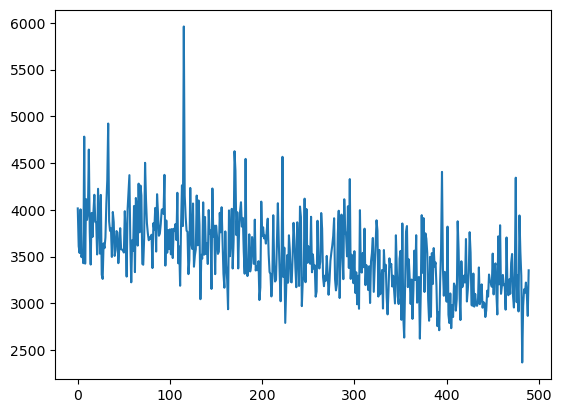

In [5]:
import matplotlib.pyplot as plt
plt.plot(image_diagnostic.background_image.sum(axis=0))

In [6]:
from scripts.automatic_emittance import ScreenEmittanceMeasurement, BeamlineConfig

drift_length = 2.2
beamline_config = BeamlineConfig(
    scan_quad_pv="QUAD:LTUS:110:BCTRL",
    scan_quad_range=[-20.0, 20.0],
    scan_quad_length=0.1068,
    transport_matrix_x =[[2.29099365,    13.24790498],
        [ -0.20459861,    -0.74662055]],
    transport_matrix_y = [[0.82340723,   -10.58404798],
        [0.04426516,     0.64548308]],
    beam_energy=3.5556261,
)


measurement = ScreenEmittanceMeasurement(
    image_diagnostic=image_diagnostic,
    beamline_config=beamline_config,
    run_dir=run_dir,
    visualize=True
)

measurement.dump_yaml()

In [7]:
print(measurement.yaml())

image_diagnostic: {screen_name: 'OTRS:LTUS:417', array_data_suffix: 'Image:ArrayData',
  array_n_cols: 'Image:ArraySize0_RBV', array_n_rows: 'Image:ArraySize1_RBV', resolution: RESOLUTION,
  background_file: /home/physics3/ml_tuning/20230817_LCLS2_LTU/OTRS_LTUS_417_background.npy,
  save_image_location: /home/physics3/ml_tuning/20230817_LCLS2_LTU/, roi: null, min_log_intensity: 4.0,
  bounding_box_half_width: 3.0, wait_time: 1.0, n_fitting_restarts: 2, visualize: false,
  testing: false}
beamline_config:
  scan_quad_pv: QUAD:LTUS:110:BCTRL
  scan_quad_range: [-20.0, 20.0]
  scan_quad_length: 0.1068
  pv_to_integrated_gradient: 1.0
  transport_matrix_x:
  - [2.29099365, 13.24790498]
  - [-0.20459861, -0.74662055]
  transport_matrix_y:
  - [0.82340723, -10.58404798]
  - [0.04426516, 0.64548308]
  beam_energy: 3.5556261
minimum_log_intensity: 4.0
wait_time: 2.0
n_shots: 3
run_dir: /home/physics3/ml_tuning/20230817_LCLS2_LTU/
secondary_observables: []
constants: {}
visualize: true



## Make background measurement

## (Optional) Test screen measurement

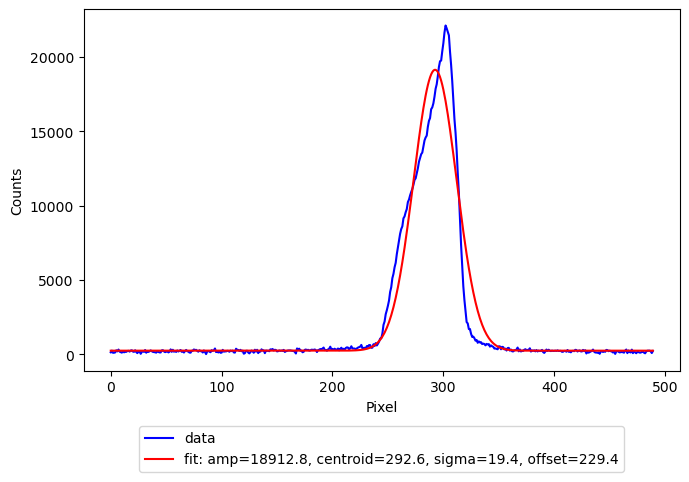

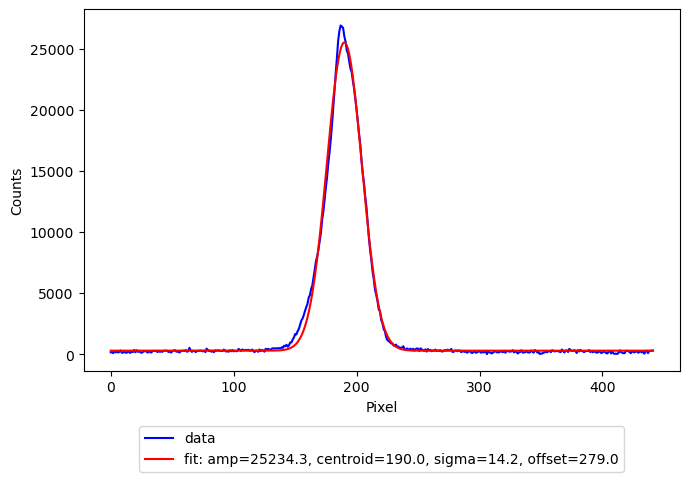

{'Cx': 292.55233604719245,
 'Cy': 190.0069844088756,
 'Sx': 785.6554151538696,
 'Sy': 574.2865273807843,
 'bb_penalty': -58.520486968187186,
 'total_intensity': 1399304.7999999996,
 'log10_total_intensity': 6.145912323884348}

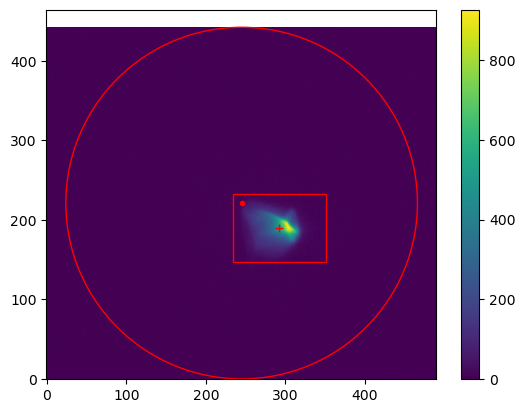

In [8]:
test_results = image_diagnostic.test_measurement()
test_results

## initialize measurement

In [9]:
# check vocs
measurement.measurement_vocs

VOCS(variables={'QUAD:LTUS:110:BCTRL': [-20.0, 20.0]}, constraints={'bb_penalty': ['LESS_THAN', 0.0], 'log10_total_intensity': ['GREATER_THAN', 4.0]}, objectives={}, constants={}, observables=['S_x_mm', 'S_y_mm'])

## Do quad scan

CAPUT QUAD:LTUS:110:BCTRL 12.276389348583605
CAPUT QUAD:LTUS:110:BCTRL -19.999990463256836
CAPUT QUAD:LTUS:110:BCTRL -3.838380813598633
CAPUT QUAD:LTUS:110:BCTRL 19.999990463256836
CAPUT QUAD:LTUS:110:BCTRL -11.919185638427734
CAPUT QUAD:LTUS:110:BCTRL 4.242422103881836


/usr/local/lcls/package/anaconda/envs/rhel7_devel/lib/python3.9/site-packages/emitopt/utils.py:517: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  k = torch.tensor(k, **tkwargs)
/usr/local/lcls/package/anaconda/envs/rhel7_devel/lib/python3.9/site-packages/emitopt/utils.py:518: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, **tkwargs)
/usr/local/lcls/package/anaconda/envs/rhel7_devel/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/usr/local/lcls/package/anaconda/envs/rhel7_devel/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value en

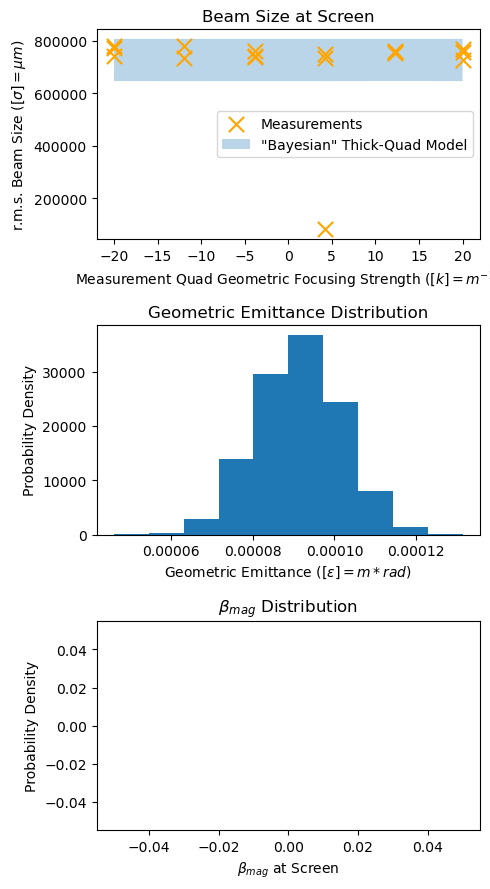

/usr/local/lcls/package/anaconda/envs/rhel7_devel/lib/python3.9/site-packages/emitopt/utils.py:517: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  k = torch.tensor(k, **tkwargs)
/usr/local/lcls/package/anaconda/envs/rhel7_devel/lib/python3.9/site-packages/emitopt/utils.py:518: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, **tkwargs)
/usr/local/lcls/package/anaconda/envs/rhel7_devel/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


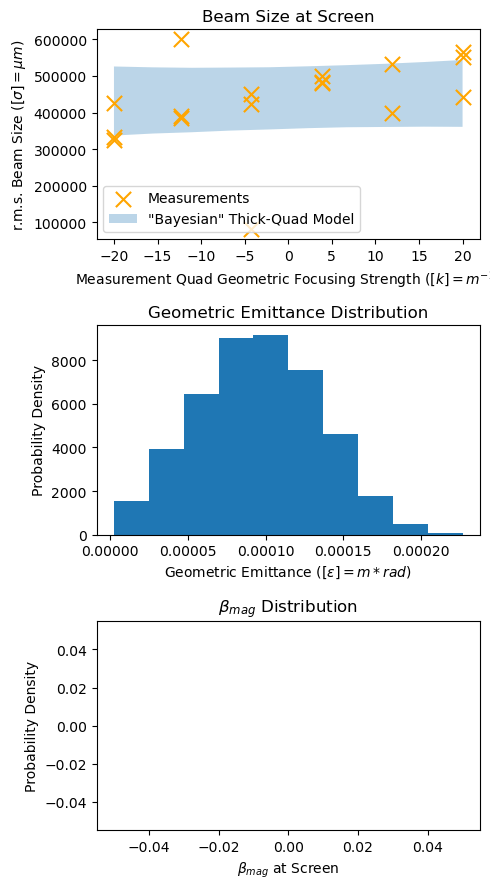

In [10]:
results, emit_xopt = measurement.run()

In [11]:
results

{'x_emittance_median': 0.6358512076641691,
 'x_emittance_05': 0.5172056211442203,
 'x_emittance_95': 0.7543170699986971,
 'y_emittance_median': 0.6642173689810119,
 'y_emittance_05': 0.21131381483344025,
 'y_emittance_95': 1.1181425677332113,
 'bmag_x_median': 614.3079559282755,
 'bmag_y_median': 203.9040005900779}